# Exploring Clustering Algorithms

In this project, we will explore and analyze clustering algorithms on 2 different types of graphs. The goal is to get a sense for the differences between clustering algorithms and understand why some algorithms work better than others in different scenarios.

In [25]:
# Basic Imports
import sys
import os
import warnings
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans

# To suppress UserWarning regarding uncconected graph for spectral clustering
warnings.simplefilter("ignore", category=UserWarning)

In [18]:
# Import tools from web-crawling repository
# Get the parent directory
tools_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "web-crawling"))
sys.path.append(tools_dir)

import tools as wbtools

In [19]:
# Make a grid of 2 visualizations for the circle graphs colored by the given labels.
# Note: The structure of the function is taken from wbtools.visualize_colored_ssbm
def visualize_colored_circle_graph(points, labels, title):
    print("Visualizing", title)

    # Allocate a figure for the 2 different graph visualizations
    plt.figure(figsize=(12, 7))

    # Spring layout with colored communities
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c=labels)
    plt.title("Spring layout with colored communities")

    # Circular layout with colored communities
    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels)
    plt.title("Spring layout with colored communities")

    # Give a title to the entire figure
    plt.suptitle(title, fontsize=16)

    # Leave some space for the suptitle 
    plt.tight_layout(rect=[0,0,1,0.95])

    plt.show()

## Generate graphs

We generate 2 types of graphs.
- A Symmetric Stochastic Block Model with n = 30 nodes, k = 3 clusters, A = 0.7 for the probabilities of edges within clusters and B = 0.1 for the probabilities of edges between clusters.

- A Circle Graph with n = 500 nodes and noise $\sigma = 0.01$.

In [20]:
ssbm_clusters = 3
circle_clusters = 2

ssbm, ssbm_community_map = wbtools.generate_ssbm_graph(30, 3, 0.7, 0.1)

circle_points, circle_labels = make_circles(n_samples=500, noise=0.01)
print("Circle graph G(n=500, noise=0.01) has been generated.")

SSBM graph G(n=30, k=3, A=0.7, B=0.1) and m=129 edges has been generated.
Circle graph G(n=500, noise=0.01) has been generated.


## Clustering on Symmetric Stochastic Block Model (SSBM)

Visualizing SSBM colored by Defined Communities


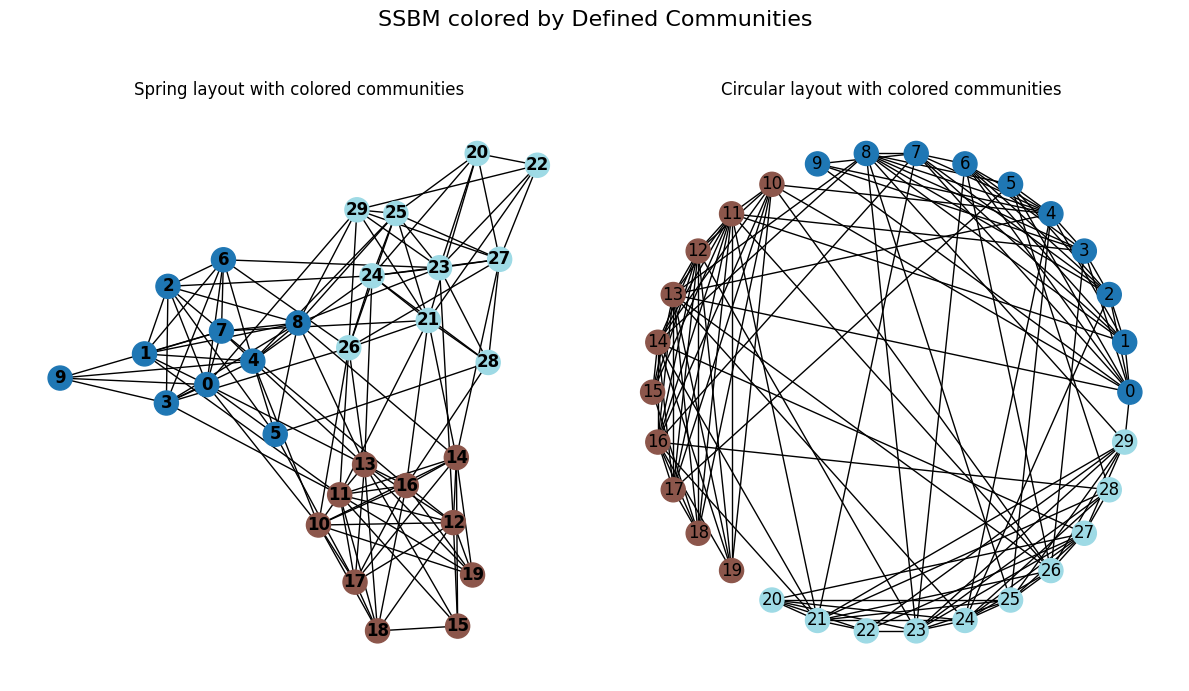

Visualizing SSBM colored by Spectral Clustering


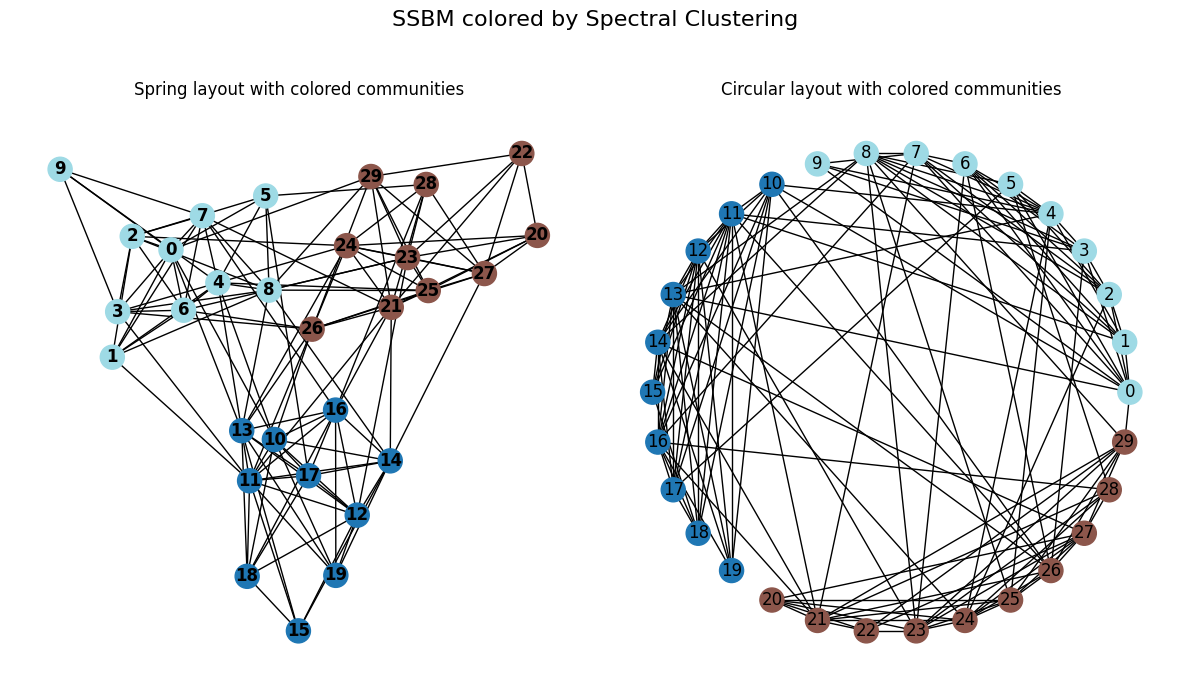

Visualizing SSBM colored by KMeans Clustering


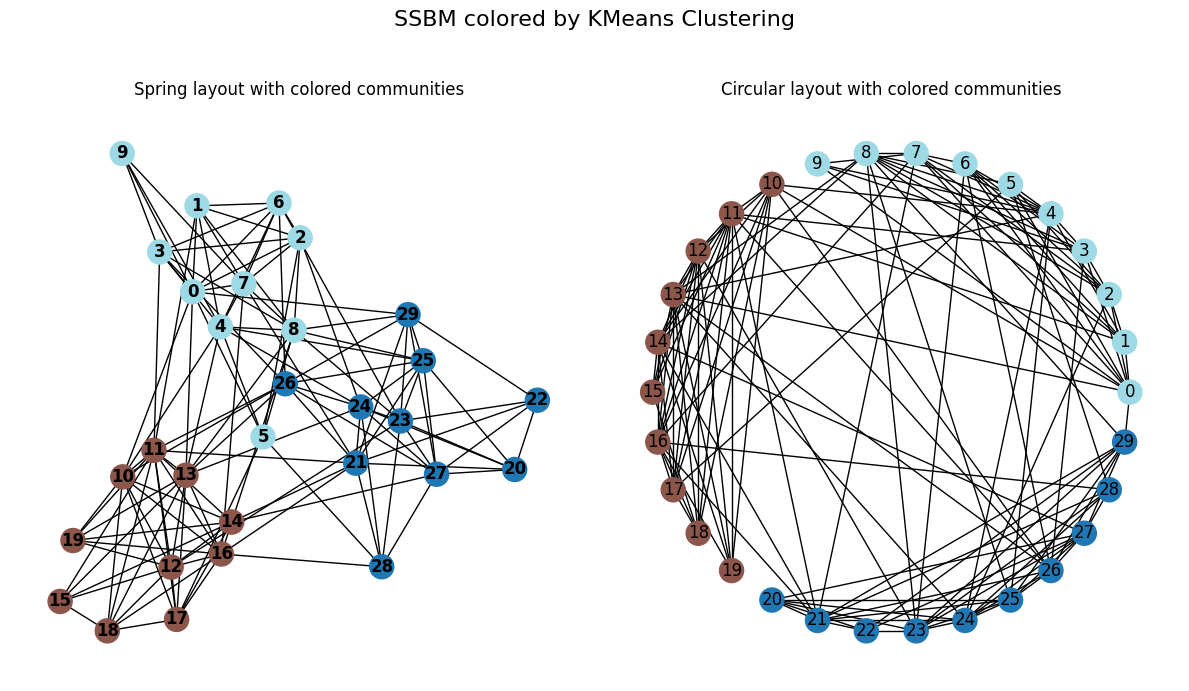

In [ ]:
wbtools.visualize_colored_ssbm(ssbm, ssbm_community_map, "SSBM colored by Defined Communities")
ssbm_adj_matrix = nx.to_numpy_array(ssbm)
ssbm_spectral_labels = SpectralClustering(n_clusters=ssbm_clusters, affinity="precomputed").fit_predict(ssbm_adj_matrix)
wbtools.visualize_colored_ssbm(ssbm, ssbm_spectral_labels, "SSBM colored by Spectral Clustering")
ssbm_kmeans_labels = KMeans(n_clusters=ssbm_clusters).fit_predict(ssbm_adj_matrix)
wbtools.visualize_colored_ssbm(ssbm, ssbm_kmeans_labels, "SSBM colored by KMeans Clustering")

Here, we see that both clustering algorithms return the same clustering that matches the actual communities for the SSBM graph. This is essentially perfect clustering. 

Spectral clustering directly uses the connectivity between nodes to identify the clusters. Since SSBM communities are defined by the differing probabilities of having edges between nodes in different communities, this makes spectral clustering work well. 

On the other hand, K-means treats each row of the SSBM adjacency matrix as a feature vector and clusters the nodes based on the similarity of these vectors. This allows K-Means to translate the connection between nodes into a high-dimensional Euclidean space where it can cluster them based on how close they are to each other in that space (i.e. how similar their connections are). Since all nodes in the same cluster are likely to be very connected to all other nodes in the same cluster and less connected between clusters, K-means method of considering global means of all nodes in the same cluster work well. Essentially, K-Means work wells because the connectivity is translated to proximity in the higher dimensional space, and this proximity successfully determines the communities.

## Clustering on Circle Graph

Visualizing Circle Graph colored by Defined Labels


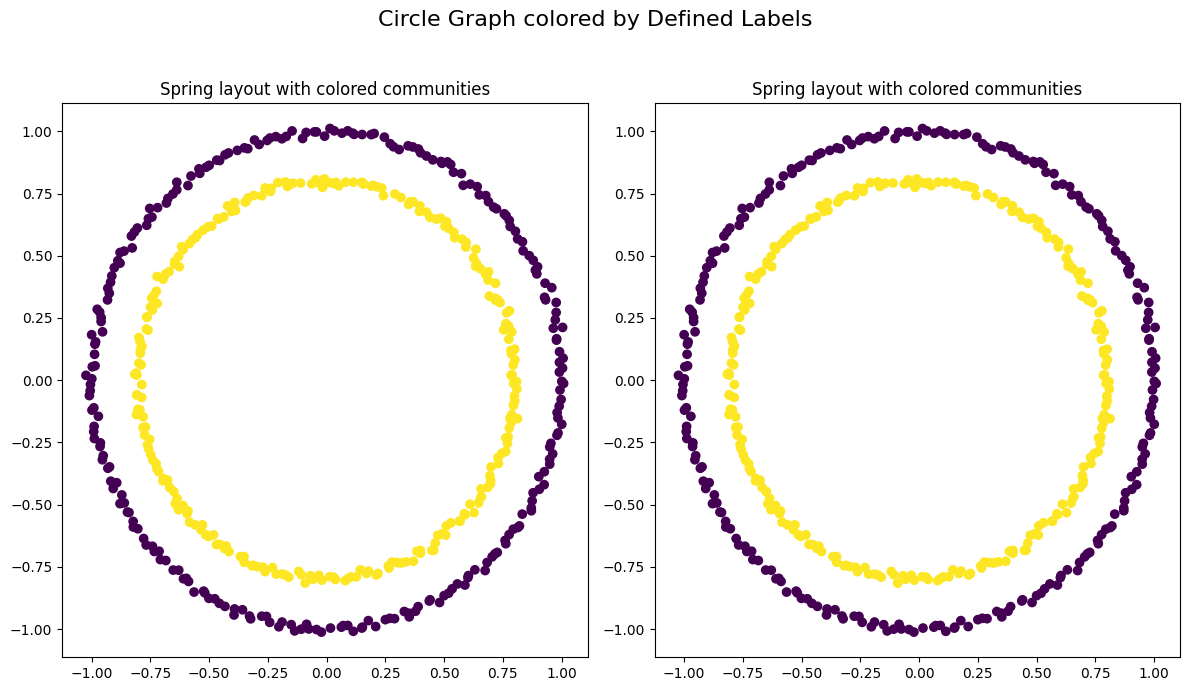

Visualizing Circle Graph colored by Spectral Clustering


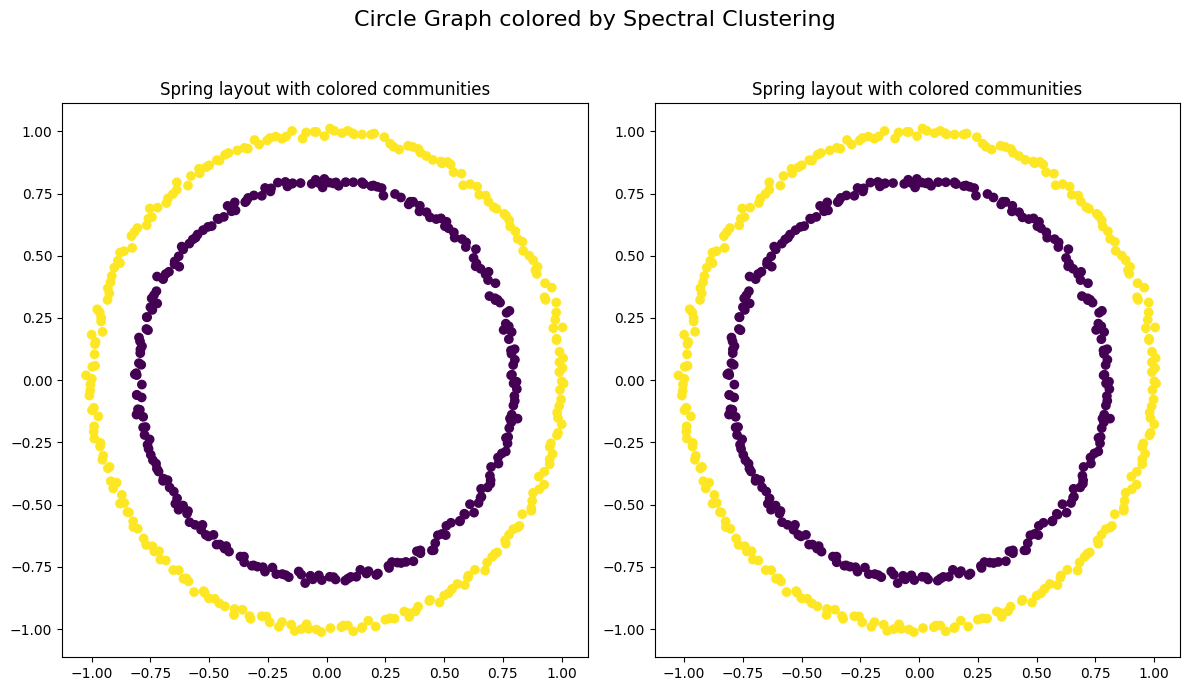

Visualizing Circle Graph colored by KMeans Clustering


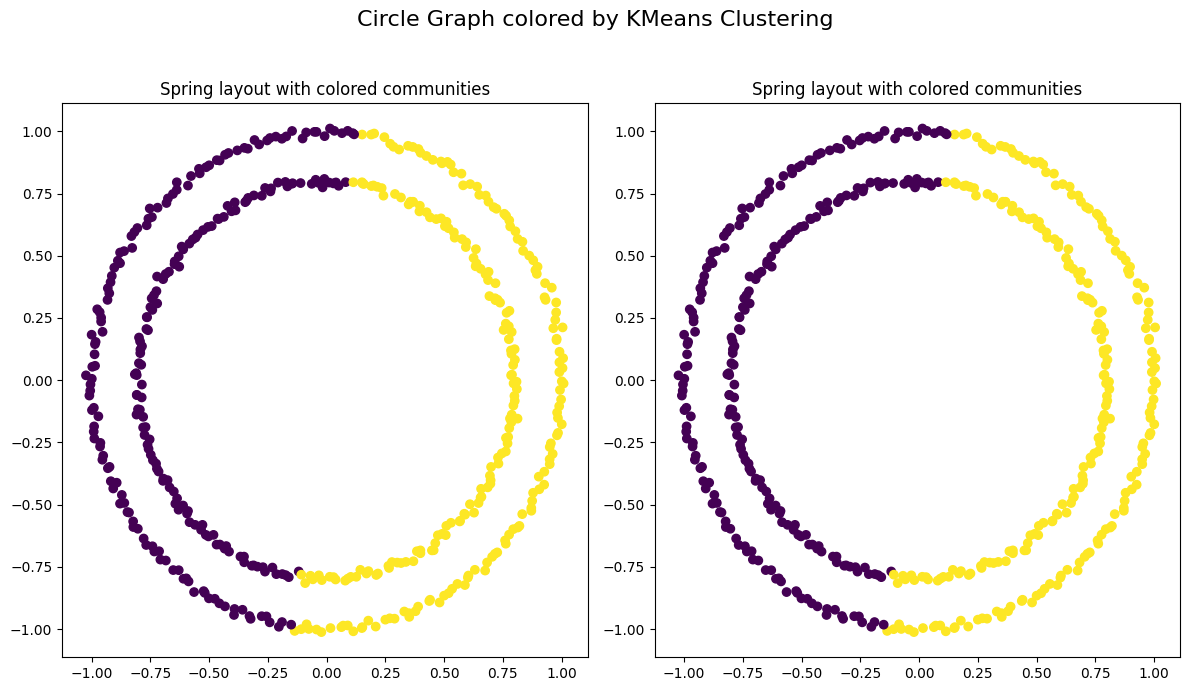

In [26]:
visualize_colored_circle_graph(circle_points, circle_labels, "Circle Graph colored by Defined Labels")
circle_spectral_labels = SpectralClustering(n_clusters=circle_clusters, affinity="nearest_neighbors").fit_predict(circle_points)
visualize_colored_circle_graph(circle_points, circle_spectral_labels, "Circle Graph colored by Spectral Clustering")
circle_kmeans_labels = KMeans(n_clusters=circle_clusters).fit_predict(circle_points)
visualize_colored_circle_graph(circle_points, circle_kmeans_labels, "Circle Graph colored by KMeans Clustering")

Here, we see that spectral clustering works well, resulting in the exact labels from the generation of the circle graph. This is because spectral clustering with nearest neighbors builds an adjacency matrix that has edges between nodes based on which nodes are closest to each other in the original space. This makes it so that points close to each other in the same circle are connected while points in different circles are too far to form edges. This allows spectral clustering to work well on the circle graph because the nodes are connected based on this intra-circle proximity.

K-means does not work well because it attempts to use global proximity to cluster the nodes based on the centers of each cluster. This worked well for the SSBM because all nodes in the same cluster were close to each other in the high-dimensional space. However, in the circle graph, nodes in the the different circles can be much closer than nodes in the same circle. If you consider nodes in the same circle on opposite sides of the plot versus nodes in different circles but on the same side of the plot, this becomes clear. Because K-means relies on the mean of all nodes in a cluster and global proximity, instead of the local proximity that spectral clustering is able to consider, spectral clustering is able to accurately assign cluster labels to the circle graph while K-means cannot. 